In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Распаковка датасета
!mkdir -p /content/RDD2022_yolo_half_split
!tar -xzf /content/drive/MyDrive/RoadGuardAI/rdd2022_half.tar.gz -C /content/RDD2022_yolo_half_split

In [8]:
import torch
print(f"Доступность GPU: {torch.cuda.is_available()}")
print(f"GPU устройство: {torch.cuda.get_device_name(0)}")

Доступность GPU: True
GPU устройство: Tesla T4


In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.0 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO
import os

model_dir = '/content/drive/MyDrive/RoadGuardAI/roadguard_models'
os.makedirs(model_dir, exist_ok=True)

model = YOLO('yolov8n.pt')

results = model.train(
    data='RDD2022_yolo_half_split/data.yaml',
    epochs=10,
    imgsz=640,                    # размер изобр-я на входе (resize изображений любого размера до 640x640)
    batch=16,                     # сколько изобр-ий обрабатывать за раз
    device=0,                     # исп. GPU
    rect=False,                   # не исп. rectangular training (для разнородных данных)
    verbose=True,                 # вывод эпох
    save=True,                    # сохраняет модель
    save_period=2,                # сохранять каждые 2 эпохи
    project=model_dir,            # сохранять в Drive
    exist_ok=True,                # перезаписывать если существует
    name='colab_v1'               # имя эксперимента
)

print("Обучение завершено! Модели сохранены в Google Drive")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=RDD2022_yolo_half_split/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=


image 1/1 /content/sample_data/Czech_000006.jpg: 640x640 2 D00s, 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


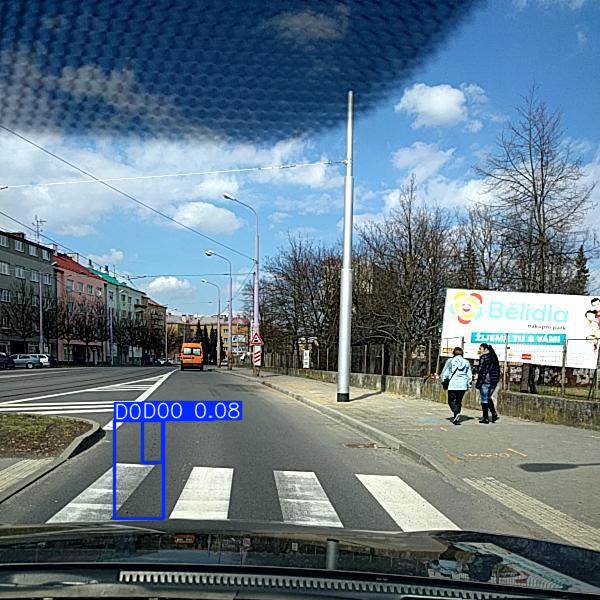

In [ ]:
# Предсказание модели на тестовом фото
model = YOLO('/content/drive/MyDrive/RoadGuardAI/roadguard_models/colab_v1/weights/best.pt')
results = model.predict(
    'sample_data/Czech_000006.jpg',
    conf=0.05,
    iou=0.45
)
results[0].show()

Размер изображения: 600x600
Bbox: 141, 405, 166, 472


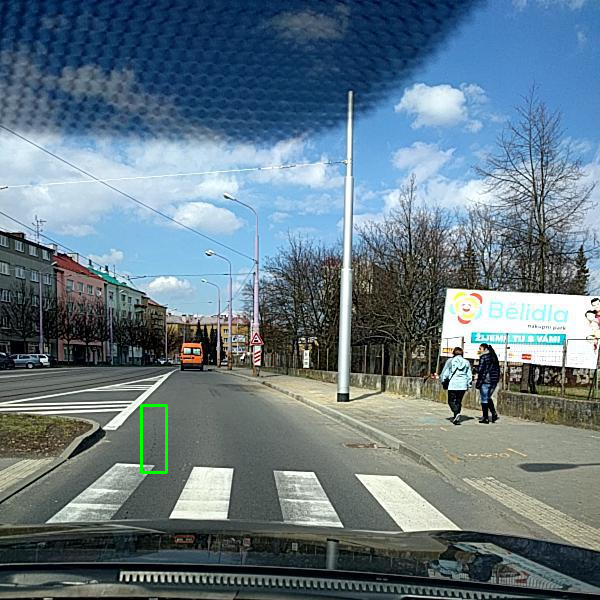

In [ ]:
# Правильный ответ для тестового фото
import cv2
from google.colab.patches import cv2_imshow  

img = cv2.imread('/content/sample_data/Czech_000006.jpg')
h, w = img.shape[:2]

xmin, ymin, xmax, ymax = 141, 405, 166, 472
print(f"Размер изображения: {w}x{h}")
print(f"Bbox: {xmin}, {ymin}, {xmax}, {ymax}")

cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

cv2.imwrite('debug.jpg', img)
cv2_imshow(img)  